#Transformando de Dicom para PNG/JPG

## Imports e Instalações

In [ ]:
!pip install pydicom
import numpy as np
import pydicom
from PIL import Image
from matplotlib import pyplot as plt

     |████████████████████████████████| 2.0 MB 5.3 MB/s 


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d pedroamaro/rsana-test-ds
!unzip /content/rsana-test-ds.zip
!rm /content/rsana-test-ds.zip

## Codigo teste

Text(0.5, 1.0, 'Imagem Dicom em pixel_array float')

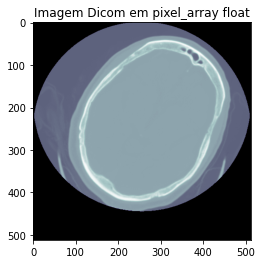

In [ ]:
path = "/content/small_rsna_ds/yes/ID_0c78effa1.dcm"
dcm = pydicom.dcmread(path)

im = dcm.pixel_array.astype(float) #assim, quando dividimos por 255 não perdemos informação

plt.imshow(im, cmap=plt.cm.bone)
plt.title('Imagem Dicom em pixel_array float')

Text(0.5, 1.0, 'Imagem Dicom em pixel_array')

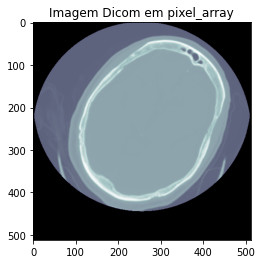

In [ ]:
# comparando sem o astype(float)
im2 = dcm.pixel_array

plt.imshow(im2, cmap=plt.cm.bone)
plt.title('Imagem Dicom em pixel_array')

In [ ]:
!mkdir test_final

In [ ]:
rescaled_im = (np.maximum(im, 0)/im.max())*255.0
test_im = np.uint8(rescaled_im)

test_final_im = Image.fromarray(test_im)

plt.imshow(test_final_im, cmap=plt.cm.gray)
plt.show

In [ ]:
a = "/content/small_rsna_ds/yes/"
print(len(a))
print(len('/content/small_rsna_ds/yes/ID_0c78effa1'))

27
39


In [ ]:
id = path[27:39] #se for o caminho do yes

test_final_im.save('/content/test_final/'+id+'.jpg')

## Convertendo todas as img de um diretorio para jpg

In [ ]:
import os

In [ ]:
!mkdir small_rsna_ds_as_jpg
!mkdir /content/small_rsna_ds_as_jpg/no
!mkdir /content/small_rsna_ds_as_jpg/yes

In [ ]:
def save_as_jpg(path, id, dest_folder):
  dcm = pydicom.dcmread(path)

  im = dcm.pixel_array.astype(float)

  rescaled_im = (np.maximum(im, 0)/im.max())*255.0
  final_im = np.uint8(rescaled_im)

  final_im = Image.fromarray(final_im)
  final_im.save(dest_folder+id+'.jpg')

In [ ]:
train_path = "/content/small_rsna_ds/yes/"
folder = os.listdir("/content/small_rsna_ds/yes/")
dest_folder = "/content/small_rsna_ds_as_jpg/yes/"

for id_ in folder:
  img_id = id_[:12]
  save_as_jpg(train_path + f"{id_}", img_id, dest_folder)

In [ ]:
train_path = "/content/small_rsna_ds/no/"
folder = os.listdir("/content/small_rsna_ds/no/")
dest_folder = "/content/small_rsna_ds_as_jpg/no/"

for id_ in folder:
  img_id = id_[:12]
  save_as_jpg(train_path + f"{id_}", img_id, dest_folder)